In [1]:
import numpy as np
import pandas as pd

In [2]:
oData = pd.read_csv('wind-turbine-scada-dataset.csv')
oData.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
# check null data
oData.isnull().sum()
# No null data is available

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [18]:
# Let's change the column name
nData = oData.rename(columns={"Date/Time": "Timestamp", "LV ActivePower (kW)":"ActivePower(kw)", "Wind Speed (m/s)":"WindSpeed(m/s)", "Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(kwh)", "Wind Direction (°)":"WindDirection"})


In [19]:
nData.head()

,Timestamp,ActivePower(kw),WindSpeed(m/s),TheoreticalPowerCurve(kwh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [20]:
# Check data description
nData.describe()

,ActivePower(kw),WindSpeed(m/s),TheoreticalPowerCurve(kwh),WindDirection
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [17]:
nData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Timestamp                50530 non-null object
ActivePower              50530 non-null float64
WindSpeed                50530 non-null float64
TheoreticalPowerCurve    50530 non-null float64
WindDirection            50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [22]:
nData['new_timestamp'] = pd.to_datetime(nData['Timestamp'])

In [29]:
nData.tail(50)

,Timestamp,ActivePower(kw),WindSpeed(m/s),TheoreticalPowerCurve(kwh),WindDirection,new_timestamp
50480,31 12 2018 15:40,368.269409,5.456291,456.513723,74.770714,2018-12-31 15:40:00
50481,31 12 2018 15:50,573.746521,6.039964,637.553372,74.835281,2018-12-31 15:50:00
50482,31 12 2018 16:00,1140.021973,7.657910,1340.607690,76.580833,2018-12-31 16:00:00
50483,31 12 2018 16:10,1478.978027,8.315362,1715.429019,74.678101,2018-12-31 16:10:00
50484,31 12 2018 16:20,1359.036987,8.209787,1652.323671,75.286987,2018-12-31 16:20:00
50485,31 12 2018 16:30,1597.265991,8.624151,1905.087285,76.233170,2018-12-31 16:30:00
50486,31 12 2018 16:40,1250.109985,7.930004,1490.171275,76.356567,2018-12-31 16:40:00
50487,31 12 2018 16:50,744.182373,5.749671,543.772723,76.052834,2018-12-31 16:50:00
50488,31 12 2018 17:00,476.473907,4.824298,293.979630,85.393311,2018-12-31 17:00:00
50489,31 12 2018 17:10,433.640991,4.591996,241.730240,85.161186,2018-12-31 17:10:00


In [39]:
nData['month'] = nData['new_timestamp'].apply(lambda x: pd.Timestamp(x).month)

In [41]:
nData.head(10)

,Timestamp,ActivePower(kw),WindSpeed(m/s),TheoreticalPowerCurve(kwh),WindDirection,new_timestamp,month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018-01-01 00:00:00,1
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018-01-01 00:10:00,1
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018-01-01 00:20:00,1
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018-01-01 00:30:00,1
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018-01-01 00:40:00,1
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018-01-01 00:50:00,1
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018-01-01 01:00:00,1
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018-01-01 01:10:00,1
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018-01-01 01:20:00,1
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018-01-01 01:30:00,1


In [52]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="darkgrid")
%matplotlib inline

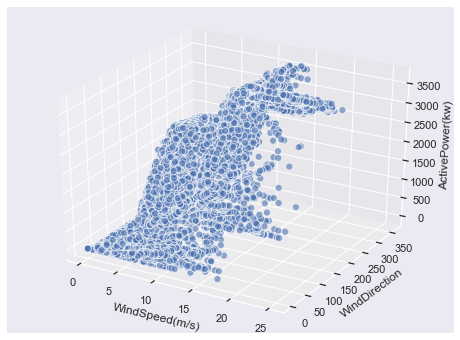

In [53]:
# Active (Actual) power vs wind speed vs wind direction
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = nData['WindSpeed(m/s)']
ys = nData['WindDirection']
zs = nData['ActivePower(kw)']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('WindSpeed(m/s)')
ax.set_ylabel('WindDirection')
ax.set_zlabel('ActivePower(kw)')

plt.show()

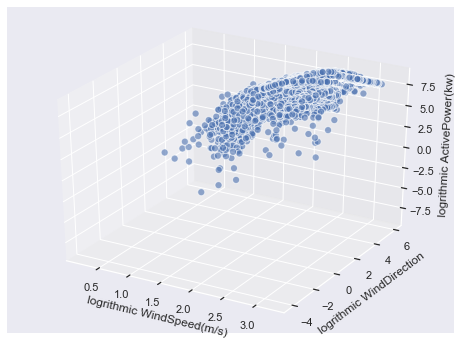

In [54]:
# Active (Actual) power vs wind speed vs wind direction
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = np.log(nData['WindSpeed(m/s)'])
ys = np.log(nData['WindDirection'])
zs = np.log(nData['ActivePower(kw)'])
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('logrithmic WindSpeed(m/s)')
ax.set_ylabel('logrithmic WindDirection')
ax.set_zlabel('logrithmic ActivePower(kw)')

plt.show()

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [160]:
# Create a new data frame for regression
regressionData = nData
regressionData.shape

(50530, 7)

In [161]:
# drop unwanted columns
regressionData = regressionData.drop(['Timestamp', 'TheoreticalPowerCurve(kwh)', 'new_timestamp', 'month'], axis=1)

In [162]:
# cleanup
regressionData = regressionData[regressionData['ActivePower(kw)'] > 0]
#regressionData = regressionData[regressionData['WindSpeed(m/s)'] > 3]
regressionData.shape

(39692, 3)

In [209]:
temp = regressionData[['WindSpeed(m/s)', 'WindDirection']]

# X = preprocessing.scale(regressionData[['WindSpeed(m/s)', 'WindDirection']].values)
# y = preprocessing.scale(regressionData['ActivePower(kw)'].values)

X = regressionData[['WindSpeed(m/s)', 'WindDirection']].values
y = regressionData['ActivePower(kw)'].values

In [204]:
X

array([[-0.91649717,  1.67442896],
       [-0.82087605,  1.77464493],
       [-0.94175173,  1.82012324],
       ...,
       [-0.08862293, -0.3568763 ],
       [ 0.17267176, -0.3620294 ],
       [ 0.32053432, -0.38548086]])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [224]:
scalerX = preprocessing.StandardScaler().fit(X_train)
scalerY = preprocessing.StandardScaler().fit(y_train.reshape(-1,1))
X_train = scalerX.transform(X_train)
y_train = np.squeeze(scalerY.transform(y_train.reshape(-1,1)))
X_test = scalerX.transform(X_test)
y_test = np.squeeze(scalerY.transform(y_test.reshape(-1,1)))

In [225]:
X_test.shape

(7939, 2)

In [226]:
y_train

array([-0.88178498,  1.42121168, -0.79537476, ...,  0.143147  ,
       -1.23674411,  1.53083396])

In [227]:
y_test.shape

(7939,)

In [228]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
coeff_df = pd.DataFrame(model.coef_, temp.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
WindSpeed(m/s),0.930109
WindDirection,-0.029331


In [230]:
y_pred = model.predict(X_test)

In [236]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Actual Value': scalerY.inverse_transform(y_test), 'Pridict Value': scalerY.inverse_transform(y_pred)})
df.head(25)

,Actual,Predicted,Actual Value,Pridict Value
0,1.082419,0.714083,1.082419,0.714083
1,-0.342817,-0.303310,-0.342817,-0.303310
2,-1.098722,-0.902141,-1.098722,-0.902141
3,-0.554644,-0.405793,-0.554644,-0.405793
4,1.028436,0.703759,1.028436,0.703759
5,1.530788,1.566728,1.530788,1.566728
6,-0.604009,-0.457206,-0.604009,-0.457206
7,-1.284798,-0.805991,-1.284798,-0.805991
8,-0.982332,-0.793804,-0.982332,-0.793804
9,-1.020474,1.333647,-1.020474,1.333647


In [232]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2624103738796222
Mean Squared Error: 0.13627673090768685
Root Mean Squared Error: 0.3691567836403482


In [233]:
X_test.size

15878

In [234]:
y_test.size

7939

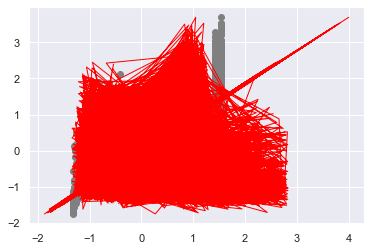

In [235]:
plt.scatter(y_test,y_pred ,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()